In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sympy
import math

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Crypto Assets Price Correlation
## Does cryptocurrencies' price correlation with BTC also apply to NFTs?


![Alt text](https://i.imgur.com/ISdPmYe.jpg)

## The 7 Steps of Scientific Method
1. Make an observation and/or ask a question - how, when, who, which

2. Perform research 
    1. Explore previous research
    2. Figure out your research method
    3. Collect data
    4. Get your data clean and tidy
    
3. Establish your hypothesis

4. Create predictions based on the hypothesis and test them
    
5. Make an observation and visualize the test results    
    
6. Build a model to confirm/reject your prediction

7. Analyze the results and draw a conclusion

## 1. Make an Observation

Having been working in the crypto and blockchain industry for more than four years now, I have repeatedly noticed that the prices of most of the cryptocurrencies and tokens on the market are strongly influenced by the price of Bitcoin. Quite often, a significant slump in the price of Bitcoin leads to a price decrease of the majority of traded cryptocurrencies, regardless of their supply, and results in the so-called "bear market", similar to the one we are witnessing at the moment of writing.

I decided to test that observation by checking the correlation between the historical prices of Bitcoin (BTC) and Ethereum (ETH) - the second largest cryptocurrency by market capitalization. Moreover, to reach a more trustworthy conclusion, I searched for data on a few more randomly selected cryptocurrencies.

Then I wondered whether this supposed correlation applies to all crypto assets on the market, and in particular to NFTs (Non-Fungible Tokens). __NFTs experienced quite a boom in popularity, sales, and prices in the middle of 2021, as if not influenced or boosted by the Bitcoin price in any way. However, in 2021 Bitcoin more than doubled its previous all-time-high price. Moreover, if NFTs weren't correlated to BTC, the current bear market would not have affected them at all.__


## 2. Perform Research 

### 2.1. Explore Previous Research

When looking for data on the crypto assets' correlations, the research one can find out there usually focuses on correlations to  commodity and financial assets outside the crypto space, such as gold or S&P500 Companies' stock. The only investigation of correlation between BTC and other cryptocurrencies' prices I could find can be accessed [here](https://www.blockchaincenter.net/en/cryptocurrency-correlation-study/?timeframe=730days&asset1=SP500&asset2=BTC#correlationtable). In fact, it does prove a strong positive correlation, though it concerns a small number of assets and a period of only two years. 

__Concerning the NFT prices' correlation to the BTC price, [a Nansen report claims that NFTs denominated in ETH are actually inversely correlated with the crypto market](https://decrypt.co/95139/ethereum-nft-inversely-correlated-crypto-market-nansen).__ The report that investigates the one-year period ending on 28 February 2022, goes on to say: _"While most crypto markets have experienced a hefty correction of late, NFTs blazed ahead with a performance of 90.9% year-to-date (YTD) when denominated in ETH, and 35.9% YTD when denominated in the greenback. Since January 1, the period in question, Bitcoin has dropped roughly 17% and Ethereum has fallen more than 31%, according to CoinMarketCap."_

However, I tend to disagree with these findings and find them a bit misleading. Here's why:
* The 2021 boom of NFT prices and sales was somewhat kickstarted by [Beeple selling an NFT for 69 million USD](https://www.theverge.com/2021/3/11/22325054/beeple-christies-nft-sale-cost-everydays-69-million) which took place in the beginning of March 2021. So, the steep increase in prices of NFTs occurred after that event, as prices remained rather high throughout 2021 and the beginning of 2022. Therefore, a comparison of the data from Feb 2021 and Feb 2022 would naturally show a spectacular growth.
* Bitcoin has indeed dropped some of its value between Jan 1st and Feb 28th of 2022, but its price more than halved throughout the following period. This current research tries to prove that that slump has affected NFT prices too. 
* The report also says: _"Data provided from Nansen indicates that its NFT 500 index (in ETH terms) has a -0.46 correlation coefficient with Bitcoin....However, when examining the price of NFTs in dollar denominations, a positive correlation emerges between the two assets.The reason for this discrepancy is primarily due to volatility, Nansen said."_ We can safely conclude that these negative correlation findings are not definitive, to say the least. 


### 2.2. Figure Out What Research Methods To Use

#### 2.2.1. Find Correlation Between Prices of BTC and 9 Other Cryptocurrencies Over a Period of Over 4 Years

To reach more conclusive results, I want to gather information on a longer period of time. However, although Bitcoin has existed since 2009, Ethereum was established in 2014 and most of the other cryptocurrencies on the market today have been born over the last two or three years. 

The crypto space is quite a dynamic one. New cryptocurrencies and other crypto assets are being created on a daily basis, but are also daily dying out. Even though hundreds of cryptocurrencies have been created following the launch of the Bitcoin blockchain, many of them did not survive until today. 

__So, striving to research at least 10 currencies and to cover a longer timeframe than 2 years, I selected assets that have been created around the year 2017 and still exist today. I managed to find data for a period of more than 4 years.__

#### 2.2.2. Find Correlation Between Prices of BTC and NFTs Over a Period of Over 4 Years, With Focus on 2021-2022

__After confirming or rejecting cryptocurrencies' correlation with BTC, comes the second part of my research. I want to check whether such correlation exists for NFTs as well.__

The first-ever NFT was created in 2014, but the technology gained popularity with the creation of the game Crypto Kitties in 2017. Consequently, data on NFTs sales and prices is available from the year 2017 onwards too. 

#### 2.2.3. Find Correlation Between Prices of BTC and NFT-Related Token Over a Period of Over 4 Years, With Focus on 2021-2022

I guess that if a price correlation exists between NFTs and BTC, the same will be present for NFT-related tokens and BTC, so I plan on checking that guess's validity.

NFT-related tokens are tokens of crypto projects that have NFTs as core element of their business model. Such projects are [Decentraland](https://decentraland.org/) - the creator of the first-ever virtual world owned by its users, [Sandbox](https://www.sandbox.game/en/) - NFT mobile game and virtual world, [Axie Infinity](https://axieinfinity.com/) - NFT-enabled video game, and many more. I will investigate Decentraland's token MANA. 

#### 2.2.4. Design and Run Models to Find the Future Price Prediction of the NFT-Related Token

I want to test NFT-related tokens' correlation also because tokens provide more market- and price-related data compared with NFTs. This is to a large extent due to the unique nature and specific price-discovery mechanisms of NFTs. I will use that price-related data to create models that will help me confirm or deny my predictions. 

### 2.3. Collect Data
#### 2.3.1. Cryptocurrencies Data

After trying to source historical data from CoinMarketCap, but failing because of a paywall, I counted entirely on Kaggle. 
__I found data on Bitcoin (BTC), Ethereum (ETH), Cardano (ADA), EOS, Litecoin (LTC), Maker (MKR), NEM, Stellar (XLM), Tron (TRX), ZCash (ZEC).__

Unfortunately, the information of each particular asset was split into a different spreadsheet, except for BTC and ETH, so I will need to merge them into one. 

In [3]:
df_btc_eth = pd.read_csv('C:/Users/35989/Desktop/DS Project/BTC.csv')
df_btc_eth.head()

,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,09/11/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,10/11/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,12/11/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,13/11/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


In [4]:
df_ada = pd.read_csv('C:/Users/35989/Desktop/DS Project/ADA-USD-2017-2022.csv')
df_ada.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440


In [5]:
df_eos = pd.read_csv('C:/Users/35989/Desktop/DS Project/EOS.csv')
df_eos.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-09,1.13307,1.20771,1.13254,1.18080,24725800.0,USD
1,2017-11-10,1.18214,1.18214,0.99488,1.03065,23024200.0,USD
2,2017-11-11,1.02906,1.18155,1.01155,1.16498,27539300.0,USD
3,2017-11-12,1.15967,1.17923,1.03654,1.09397,29229800.0,USD
4,2017-11-13,1.09447,1.18850,1.08344,1.17888,20848600.0,USD


In [6]:
df_ltc = pd.read_csv('C:/Users/35989/Desktop/DS Project/litecoin.csv')
df_ltc.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2016-08-24,3.95,3.96,3.61,3.84,21857,USD
1,2016-08-25,3.84,3.88,3.75,3.81,21870,USD
2,2016-08-26,3.81,3.90,3.77,3.81,14349,USD
3,2016-08-27,3.81,3.85,3.62,3.78,4906,USD
4,2016-08-28,3.78,3.78,3.62,3.72,8192,USD


In [7]:
df_mkr = pd.read_csv('C:/Users/35989/Desktop/DS Project/Maker.csv')
df_mkr.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-20,252.481995,278.230988,252.401993,272.449005,259174.0,USD
1,2017-11-21,272.019989,288.925995,260.019012,279.920013,9649.0,USD
2,2017-11-22,280.277008,400.648987,280.050995,326.191986,14577.0,USD
3,2017-11-23,326.941986,359.498993,320.864990,347.436005,1187.0,USD
4,2017-11-24,345.696991,408.135010,339.252991,401.825012,166167.0,USD


In [8]:
df_nem = pd.read_csv('C:/Users/35989/Desktop/DS Project/NEM.csv')
df_nem.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-09,0.193797,0.221762,0.189496,0.220927,7388760.0,USD
1,2017-11-10,0.221480,0.235801,0.185654,0.192903,10625300.0,USD
2,2017-11-11,0.192005,0.208632,0.184363,0.192428,6940500.0,USD
3,2017-11-12,0.191179,0.191179,0.165319,0.180406,12126100.0,USD
4,2017-11-13,0.180876,0.203314,0.180023,0.192662,7806090.0,USD


In [9]:
df_xlm = pd.read_csv('C:/Users/35989/Desktop/DS Project/stellar.csv')
df_xlm.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-02-22,0.00204,0.00209,0.00194,0.00203,7523981,USD
1,2017-02-23,0.00203,0.00207,0.00194,0.00201,48686,USD
2,2017-02-24,0.00201,0.00201,0.00201,0.00201,0,USD
3,2017-02-25,0.00188,0.00194,0.00182,0.00189,691874,USD
4,2017-02-26,0.00189,0.00195,0.00178,0.00190,2093558,USD


In [10]:
df_trx = pd.read_csv('C:/Users/35989/Desktop/DS Project/tron.csv')
df_trx.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-14,0.002130,0.002589,0.002098,0.002492,303515200,USD
1,2017-11-15,0.002492,0.002600,0.002211,0.002278,403097184,USD
2,2017-11-16,0.002278,0.002315,0.001783,0.002156,557621696,USD
3,2017-11-17,0.002156,0.002200,0.001900,0.001911,939786048,USD
4,2017-11-18,0.001911,0.002116,0.001900,0.002006,1060941184,USD


In [11]:
df_zec = pd.read_csv('C:/Users/35989/Desktop/DS Project/Zcash.csv')
df_zec.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-09,250.552994,270.177002,244.143005,261.998993,86573400.0,USD
1,2017-11-10,261.954987,272.757996,231.582001,237.882996,78740400.0,USD
2,2017-11-11,238.162003,269.717010,236.244995,253.598999,68016096.0,USD
3,2017-11-12,253.625000,288.670990,231.677994,288.670990,119639000.0,USD
4,2017-11-13,298.734009,298.734009,258.329010,265.453003,115940000.0,USD


#### 2.3.2. NFTs Data

Concerning the data on NFTs, striving to get a fuller picture of the NFT market dynamics, and not just of one single NFT collection, I managed to source information from the statistics and analytics website [NonFungible](https://nonfungible.com/market-tracker). I was able to find data on all NFT sales for the period since June 2017 until today.

For the MANA's historical data I countd again on Kaggle.

In [12]:
df_allnfts = pd.read_csv('C:/Users/35989/Desktop/DS Project/allcategories_nfts_chart.csv')
df_allnfts.head()

,DateTime,Number of sales,Sales USD
0,2017-06-23 00:00:00,19,1020.30
1,2017-06-24 00:00:00,21,1240.84
2,2017-06-25 00:00:00,13,517.55
3,2017-06-26 00:00:00,14,424.63
4,2017-06-27 00:00:00,33,2092.91


In [13]:
df_dcntrl = pd.read_csv('C:/Users/35989/Desktop/DS Project/Decentraland.csv')
df_dcntrl.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-09,0.014329,0.016111,0.013886,0.015130,653800,USD
1,2017-11-10,0.015162,0.015734,0.012645,0.012940,296429,USD
2,2017-11-11,0.013201,0.013616,0.011758,0.011979,237865,USD
3,2017-11-12,0.011975,0.011975,0.010125,0.010505,242761,USD
4,2017-11-13,0.010628,0.011660,0.010628,0.011330,225836,USD


### 2.4 Get Your Data Clean and Tidy

For each one of the crypto assets spreadsheets, I need to:
1. Assume all prices are represented in USD, so there is no need to keep the USD column.
2. Get the Date and Price/Close/Adj Close Price columns. The rest can be dropped.
3. Convert the Date column of all spreadsheets into one universal format.
4. Rename the Price/Close/Adj Close Price columns to include the currency's ticker.
5. Merge all dataframes by the column "Date", so as the Price/Close Price columns become columns in the new dataframe. 
6. Remove index columns and NAN cells.

For the CryptoPunks and the All NFTs spreadsheets:
1. Convert the Date column into the same universal format as with the cryptocurrencies.
2. Find the Average Sale Price for each NFT asset by dividing the Sales USD by the Number of Sales. 
3. Merge the columns of Average NFTs Price, MANA's Close Price, and BTC Price into one dataframe.
4. Remove index columns and NAN cells.

In [14]:
#Dropping unnecessary columns and renaming the "Price" columns
#1
df_btc_eth = df_btc_eth.drop(['Adj Close (BNB)', 'Volume (BNB)', 'Volume (BTC)', 'Adj Close (USDT)', 'Volume (USDT)', 'Volume (ETH)'], axis=1)
df_btc_eth = df_btc_eth.rename(columns={"Adj Close (BTC)":"BTC Price", "Adj Close (ETH)":"ETH Price"})

In [15]:
#2
df_ada = df_ada.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df_ada = df_ada.rename(columns={"Adj Close":"ADA Price"})

In [16]:
#3
df_eos = df_eos.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_eos = df_eos.rename(columns={'Close':'EOS Price'})

In [17]:
#4
df_ltc = df_ltc.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_ltc = df_ltc.rename(columns={'Close':'LTC Price'})

In [18]:
#5
df_mkr = df_mkr.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_mkr = df_mkr.rename(columns={'Close':'MKR Price'})

In [19]:
#6
df_nem = df_nem.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_nem = df_nem.rename(columns={'Close':'NEM Price'})

In [20]:
#7
df_xlm = df_xlm.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_xlm = df_xlm.rename(columns={'Close':'XLM Price'})

In [21]:
#8
df_trx = df_trx.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_trx = df_trx.rename(columns={'Close':'TRX Price'})

In [22]:
#9
df_zec = df_zec.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_zec = df_zec.rename(columns={'Close':'ZEC Price'})

In [23]:
#Resetting the indices to prepare for merging
df_btc_eth = df_btc_eth.reset_index()
df_ada = df_ada.reset_index()
df_eos = df_eos.reset_index() 
df_ltc = df_ltc.reset_index()
df_mkr = df_mkr.reset_index()
df_nem = df_nem.reset_index()
df_xlm = df_xlm.reset_index()
df_trx = df_trx.reset_index()
df_zec = df_zec.reset_index()

In [24]:
#Merging the dataframes into one. Choosing between Right and Left Join according to the timeframe I have data for.
#Converting the "Date" column to dtype('<M8[ns]') to avoid getting errors
df_btc_eth['Date'] = pd.to_datetime(df_btc_eth['Date'])
df_ada['Date'] = pd.to_datetime(df_ada['Date'])
df_eos['Date'] = pd.to_datetime(df_eos['Date'])
df_ltc['Date'] = pd.to_datetime(df_ltc['Date'])
df_mkr['Date'] = pd.to_datetime(df_mkr['Date'])
df_nem['Date'] = pd.to_datetime(df_nem['Date'])
df_xlm['Date'] = pd.to_datetime(df_xlm['Date'])
df_trx['Date'] = pd.to_datetime(df_trx['Date'])
df_zec['Date'] = pd.to_datetime(df_zec['Date'])

In [25]:
#Merging the BTC_ETH and the ADA dataframe. Dropping NANs that were generated because of difference in timeframes
#Two newly-generating columns appeares because the date sequence of the two dataframes was different. Dropping them
df_new1 = pd.merge(df_btc_eth, df_ada, on='Date', how='right').dropna()
df_new1 = df_new1.drop(['index_x', 'index_y'], axis=1)

In [26]:
#Merging the new DF with the rest of the Cryptocurrency dataframes.
df_new2 = pd.merge(df_new1, df_eos, on='Date', how='right').dropna()
df_new2 = df_new2.drop(['index'], axis=1)

In [27]:
df_new3 = pd.merge(df_new2, df_ltc, on='Date', how='left')
df_new3 = df_new3.drop(['index'], axis=1)

In [28]:
df_new4 = pd.merge(df_new3, df_mkr, on='Date', how='left').dropna()
df_new4 = df_new4.drop(['index'], axis=1)

In [29]:
df_new5 = pd.merge(df_new4, df_nem, on='Date', how='left').dropna()
df_new5 = df_new5.drop(['index'], axis=1)

In [30]:
df_new6 = pd.merge(df_new5, df_xlm, on='Date', how='left').dropna()
df_new6 = df_new6.drop(['index'], axis=1)

In [31]:
df_new7 = pd.merge(df_new6, df_trx, on='Date', how='left').dropna()
df_new7 = df_new7.drop(['index'], axis=1)

In [32]:
df_final = pd.merge(df_new7, df_zec, on='Date', how='left').dropna()
df_final = df_final.drop(['index'], axis=1)
df_final.head()

,Date,BTC Price,ETH Price,ADA Price,EOS Price,LTC Price,MKR Price,NEM Price,XLM Price,TRX Price,ZEC Price
0,2017-11-20,8200.639648,366.730011,0.029581,1.99400,72.62,272.449005,0.213041,0.03840,0.002156,302.165985
1,2017-11-21,8071.259766,360.401001,0.028330,1.90416,70.00,279.920013,0.202712,0.03787,0.002146,290.636993
2,2017-11-22,8253.549805,380.652008,0.028549,1.88525,72.31,326.191986,0.203891,0.04229,0.002347,319.731995
3,2017-11-23,8038.770020,410.165985,0.027444,1.89173,73.30,347.436005,0.201437,0.04015,0.002172,311.550995
4,2017-11-24,8253.690430,474.911011,0.028382,1.88347,77.54,401.825012,0.209109,0.04004,0.002022,346.364014


In [33]:
#Cleaning and tidying the NFT dataframes in the same way
df_allnfts = df_allnfts.rename(columns={'DateTime':'Date'})

In [34]:
df_allnfts['Date'] = pd.to_datetime(df_allnfts['Date']).dt.date
df_dcntrl['Date'] = pd.to_datetime(df_dcntrl['Date']).dt.date

In [35]:
#Creating new columns with the average price of a single NFT
#Dropping the unnecessary columns
df_allnfts['Average NFT Price'] = round(df_allnfts['Sales USD']/df_allnfts['Number of sales'])
df_allnfts = df_allnfts.dropna()
df_allnfts = df_allnfts.drop(['Number of sales', 'Sales USD'], axis=1)

In [36]:
#Merging the two NFT dataframes into one and joining it with the BTC_ETH dataframe.
df_nft1 = pd.merge(df_allnfts, df_dcntrl, how='right', on='Date')
df_nft1 = df_nft1.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
df_nft1 = df_nft1.rename(columns={'Close':'MANA Price'})
df_nft1 = df_nft1.dropna()

In [37]:
df_nft1['Date'] = pd.to_datetime(df_nft1['Date'])
df_btc_eth['Date'] = pd.to_datetime(df_btc_eth['Date'])

In [38]:
df_nft = pd.merge(df_nft1, df_btc_eth, how='left', on='Date').dropna()
df_nft = df_nft.drop(['index', 'ETH Price'], axis=1)

In [106]:
df_nft.head()

,Date,Average NFT Price,MANA Price,BTC Price
1,2017-11-12,91.0,0.010505,16936.800781
2,2017-11-13,32.0,0.011330,6559.490234
3,2017-11-14,68.0,0.011419,6635.750000
4,2017-11-15,69.0,0.012002,7315.540039
5,2017-11-19,35.0,0.013099,8036.490234


__At the end of the cleaning and tidying process, I have data on 10 cryptocurrencies, 1 NFT-Related Token and collective NFT sales for a period of more than 4 years.__

__It was essential to get data for 2022 since that is when the latest "bear market" is occurring and it is exactly what will help me to prove that the decline of BTC's price spills over into other crypto assets.__

## 3. Establish Hypothesis

__My hypothesis is that a strong positive correlation (between 0.5 and 1) have been existing between the prices of BTC and the selected cryptocurrencies over the whole time period I am observing.__

__I also assume that a positive correlation exists between prices of BTC and other crypto assets like NFTs, and by extension - NFT-related tokens. Though, I suppose that such a correlation would not be as strong as with cryptocurrencies, but it would surely still be positive.__

__My main claim is that if NFTs' prices were not correlated with Bitcoin's, their 2021 ascent would have continued throughout 2022 and would not have been affected by the "bear market" that officially started around May/June 2022. I will try to prove that claim by running a model that will predict the NFT-related token (MANA) prices for the period between May and July 2022, based on historical price data for previous periods. If that predicted price is significantly higher than the actual price, that would mean that the price was affected by the BTC drop.__

## 4. Create Predictions Based on the Hypothesis

### 4.1. Cryptocurrencies Prediction and Test

My first prediction is that prices of the selected cryptocurrencies have had a strong positive correlation with BTC throughtout the whole observed timeperiod. 

I will test my first prediction by finding the correlation between each asset and BTC. This first prediction will be considered proven if the correlation for all assets and throughout the whole timeperiod is between 0.5 and 1.

In [39]:
#Finding the correlation between each cryptocurrency and BTC
def crypto_cor(df, column):
    df[column].astype(int)
    cor_currencies = df[column].corr(df.iloc[:, 1])
    return cor_currencies

In [40]:
#ETH/BTC Correlation
cor_btc_eth = crypto_cor(df_final, 'ETH Price')
cor_btc_eth

0.9254810596638703

In [41]:
#ADA/BTC Correlation
cor_btc_ada = crypto_cor(df_final, 'ADA Price')
cor_btc_ada

0.8646012212067615

In [42]:
#EOS/BTC Correlation
cor_btc_eos = crypto_cor(df_final, 'EOS Price')
cor_btc_eos

-0.09945261508596391

In [43]:
#LTC/BTC Correlation
cor_btc_ltc = crypto_cor(df_final, 'LTC Price')
cor_btc_ltc

0.6647736401842471

In [44]:
#MKR/BTC Correlation
cor_btc_mkr = crypto_cor(df_final, 'MKR Price')
cor_btc_mkr

0.8660876409951817

In [45]:
#NEM/BTC Correlation
cor_btc_nem = crypto_cor(df_final, 'NEM Price')
cor_btc_nem

0.1674781960324532

In [46]:
#XLM/BTC Correlation
cor_btc_xlm = crypto_cor(df_final, 'XLM Price')
cor_btc_xlm

0.5856233267175572

In [47]:
#TRX/BTC Correlation
cor_btc_trx = crypto_cor(df_final, 'TRX Price')
cor_btc_trx

0.7450882811609153

In [48]:
#ZEC/BTC Correlation
cor_btc_zec = crypto_cor(df_final, 'ZEC Price')
cor_btc_zec

0.1337292104440888

### 4.2. NFTs Prediction and Test

My second prediction is that during the period from 2017 to the end of 2020, correlation of NFTs and BTC prices may not have existed at all. However, ever since NFTs gained popularity and, so to say, entered the mainstream, there has been a positive correlation with BTC. A steep decline in prices of NFTs in accordance with BTC's drop around May/July 2022 would prove that prediction.

I will test my second prediction by finding the correlation between NFT assets and BTC, and MANA and BTC. This second prediction will be proven if the correlation during 2021 and 2022 is between 0 and 1.

In [49]:
#Slicing the observed timeperiod into 2 - 2017-2020 and 2021-2022
df_nft_old = df_nft.loc[df_nft['Date'] <= '2021']

In [50]:
df_nft_new = df_nft.loc[df_nft['Date'] >= '2021']

In [51]:
#Converting each asset price to int in order to apply the corr function
df_nft_old['BTC Price'].astype(int)
df_nft_old['Average NFT Price'].astype(int)
df_nft_old['MANA Price'].astype(int)

1       0
2       0
3       0
4       0
5       0
       ..
1140    0
1141    0
1142    0
1143    0
1144    0
Name: MANA Price, Length: 1134, dtype: int32

In [52]:
#Average NFT Price to BTC Correlation over the period from 2017 to 2020
cor_btc_nft = df_nft_old['Average NFT Price'].corr(df_nft_old['BTC Price'])
cor_btc_nft

0.38882403527076564

In [53]:
#Average CryptoPunk Price to BTC Correlation over the period from 2017 to 2020
cor_btc_mana = df_nft_old['MANA Price'].corr(df_nft_old['BTC Price'])
cor_btc_mana

0.18526683600523436

In [54]:
#Average NFT Price to BTC Correlation over the period from 2021 to 2022
cor_btc_nft_new = df_nft_new['Average NFT Price'].corr(df_nft_new['BTC Price'])
cor_btc_nft_new

0.04809276456453729

In [55]:
#Average CryptoPunk Price to BTC Correlation over the period from 2021 to 2022
cor_btc_mana_new = df_nft_new['MANA Price'].corr(df_nft_new['BTC Price'])
cor_btc_mana_new

0.11316742118363408

## 5. Make an observation and Visualize the Test Results

### 5.1. Cryptocurrencies Correlation with BTC

It turns out that my prediction was proven right for 6 of the selected currencies, and wrong for 3 of them, namely EOS, NEM, and ZEC. The correlation of NEM and ZEC with BTC is still positive but it is not as strong as I thought, whereas the one of EOS and BTC is negative. Let's visualize the results.

Text(0.5, 1.0, 'Correlation Matrix')

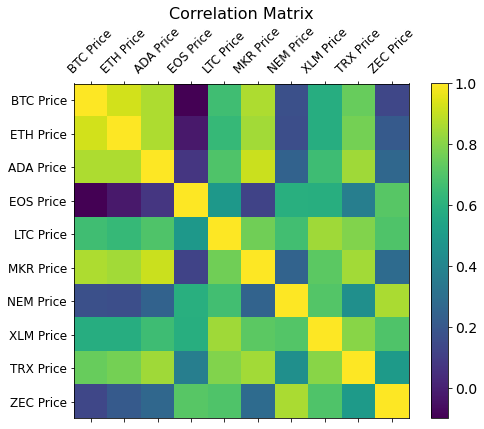

In [56]:
#Visualizing the Correlation Matrix for all 10 cryptocurrencies
f = plt.figure(figsize=(8, 6))
plt.matshow(df_final.corr(), fignum=f.number)
plt.xticks(range(df_final.select_dtypes(['number']).shape[1]), df_final.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df_final.select_dtypes(['number']).shape[1]), df_final.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Performing Additional Tests and Making an Observation Based on Them

Now I want to check specifically the BTC correlation over time with these 3 currencies that did not confirm my hypothesis, namely EOS, NEM, and ZEC. My goal is to understand:
* Were there periods of a strong positive correlation?
* How often during the observed period a negative correlation has occurred?
* Are different occurrences of negative correlation close in time to each other, and if yes - was there a specific event that may have influenced the assets' price during that period?

##### EOS/BTC Correlation Over Time

In [57]:
df_final['EOS_BTC_COR'] = df_final['EOS Price'].rolling(48).corr(df_final['BTC Price'])

In [58]:
df_final.index = pd.to_datetime(df_final['Date'],format='%y/%m/%d')

In [59]:
eos_btc_by_months = df_final.groupby(pd.Grouper(key="Date", freq="M"))['EOS_BTC_COR'].mean()
eos_btc_by_months = eos_btc_by_months.dropna()

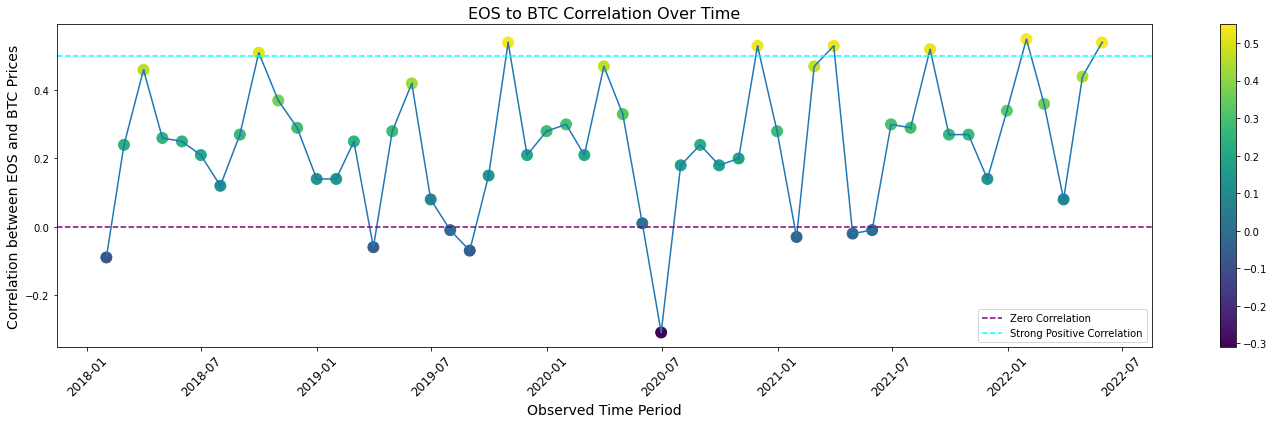

In [60]:
x = []
y = []
for date, el in eos_btc_by_months.iteritems():
    x.append(date)
    y.append(round(el, 2))
    
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(20,6))
plt.scatter(x, y, c=y, cmap=cm, s=120)
plt.plot(x, y, marker = '.', markersize = 1)
plt.axhline(y = 0, color = 'purple', linestyle = '--', label= "Zero Correlation")
plt.axhline(y = 0.5, color = 'aqua', linestyle = '--', label= "Strong Positive Correlation")
plt.legend(loc = 'lower right')
plt.colorbar()
plt.xticks(fontsize=12, rotation=45)
plt.title("EOS to BTC Correlation Over Time", fontsize=16)
plt.xlabel("Observed Time Period", fontsize=14)
plt.ylabel("Correlation between EOS and BTC Prices", fontsize=14)
plt.tight_layout()
plt.show()

##### NEM/BTC Correlation Over Time

In [61]:
df_final['NEM_BTC_COR'] = df_final['NEM Price'].rolling(48).corr(df_final['BTC Price'])

In [62]:
df_final.index = pd.to_datetime(df_final['Date'],format='%y/%m/%d')

In [63]:
nem_btc_by_months = df_final.groupby(pd.Grouper(key="Date", freq="M"))['NEM_BTC_COR'].mean()
nem_btc_by_months = nem_btc_by_months.dropna()

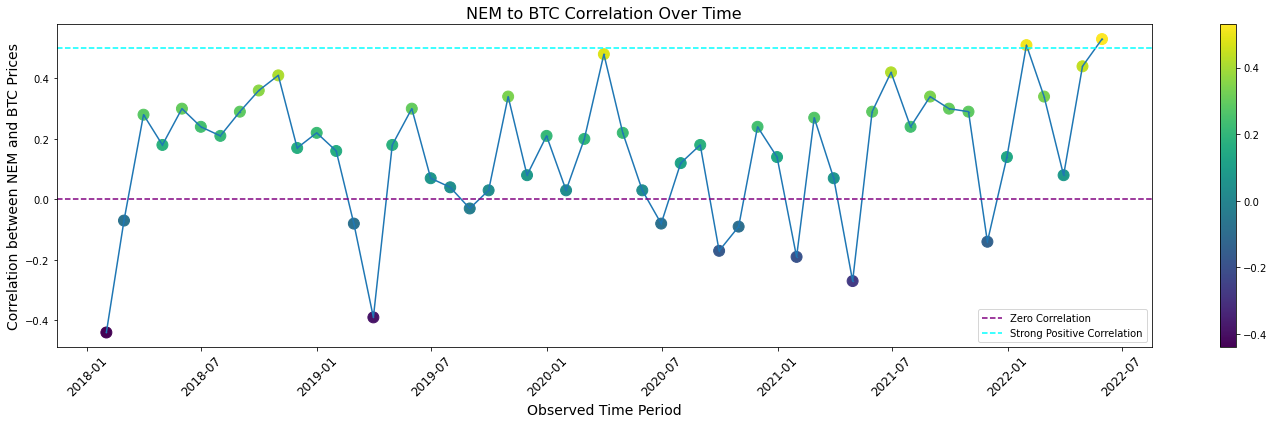

In [64]:
x1 = []
y1 = []
for date, el in nem_btc_by_months.iteritems():
    x1.append(date)
    y1.append(round(el, 2))
    
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(20,6))
plt.scatter(x1, y1, c=y1, cmap=cm, s=120)
plt.plot(x1, y1, marker = '.', markersize = 1)
plt.axhline(y = 0, color = 'purple', linestyle = '--', label= "Zero Correlation")
plt.axhline(y = 0.5, color = 'aqua', linestyle = '--', label= "Strong Positive Correlation")
plt.legend(loc = 'lower right')
plt.colorbar()
plt.xticks(fontsize=12, rotation=45)
plt.title("NEM to BTC Correlation Over Time", fontsize=16)
plt.xlabel("Observed Time Period", fontsize=14)
plt.ylabel("Correlation between NEM and BTC Prices", fontsize=14)
plt.tight_layout()
plt.show()

##### ZEC/BTC Correlation Over Time

In [65]:
df_final['ZEC_BTC_COR'] = df_final['ZEC Price'].rolling(48).corr(df_final['BTC Price'])

In [66]:
df_final.index = pd.to_datetime(df_final['Date'],format='%y/%m/%d')

In [67]:
zec_btc_by_months = df_final.groupby(pd.Grouper(key="Date", freq="M"))['ZEC_BTC_COR'].mean()
zec_btc_by_months = zec_btc_by_months.dropna()

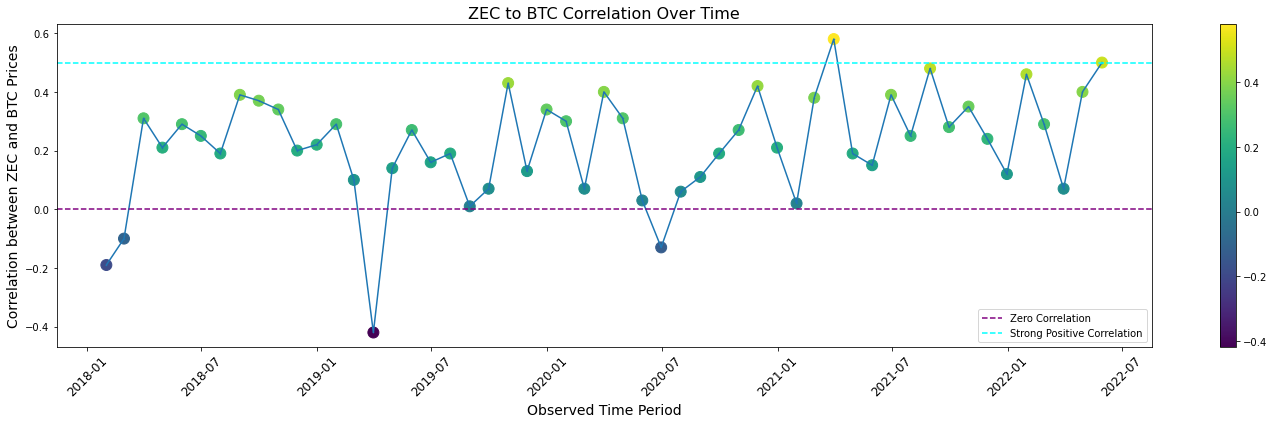

In [68]:
x = []
y = []
for date, el in zec_btc_by_months.iteritems():
    x.append(date)
    y.append(round(el, 2))
    
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(20,6))
plt.scatter(x, y, c=y, cmap=cm, s=120)
plt.plot(x, y, marker = '.', markersize = 1)
plt.axhline(y = 0, color = 'purple', linestyle = '--', label= "Zero Correlation")
plt.axhline(y = 0.5, color = 'aqua', linestyle = '--', label= "Strong Positive Correlation")
plt.legend(loc = 'lower right')
plt.colorbar()
plt.xticks(fontsize=12, rotation=45)
plt.title("ZEC to BTC Correlation Over Time", fontsize=16)
plt.xlabel("Observed Time Period", fontsize=14)
plt.ylabel("Correlation between ZEC and BTC Prices", fontsize=14)
plt.tight_layout()
plt.show()

### 5.2. NFTs Correlation with BTC

It turns out I was wrong when supposing that there was no correlation between NFT and BTC prices during the period before 2021. In reality, the BTC correlation with the whole NFT market over the years 2017-2020 was much stronger than it was over 2021-2022. 

The correlation of the NFT-related token MANA with BTC has been weak throughout the whole observed period, but it's been still positive, and for 2021-2022, it's even stronger than the NFTs/BTC one.

Therefore, a positive correlation (between 0 and 1) has existed for both NFTs and MANA, so my hypothesis is proven right. Let's visualize the results for 2021-2022. 

##### NFT/BTC Correlation Over 2021-2022

In [69]:
#Visualizing the rolling correlation
df_nft_new['NFT_BTC_COR'] = df_nft_new['Average NFT Price'].rolling(48).corr(df_nft_new['BTC Price'])

C:\Users\35989\AppData\Local\Temp/ipykernel_20396/1515384041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nft_new['NFT_BTC_COR'] = df_nft_new['Average NFT Price'].rolling(48).corr(df_nft_new['BTC Price'])


In [70]:
df_nft_new.index = pd.to_datetime(df_nft_new['Date'],format='%y/%m/%d')

In [71]:
nft_btc_by_months = df_nft_new.groupby(pd.Grouper(key="Date", freq="M"))['NFT_BTC_COR'].mean()
nft_btc_by_months = nft_btc_by_months.dropna()

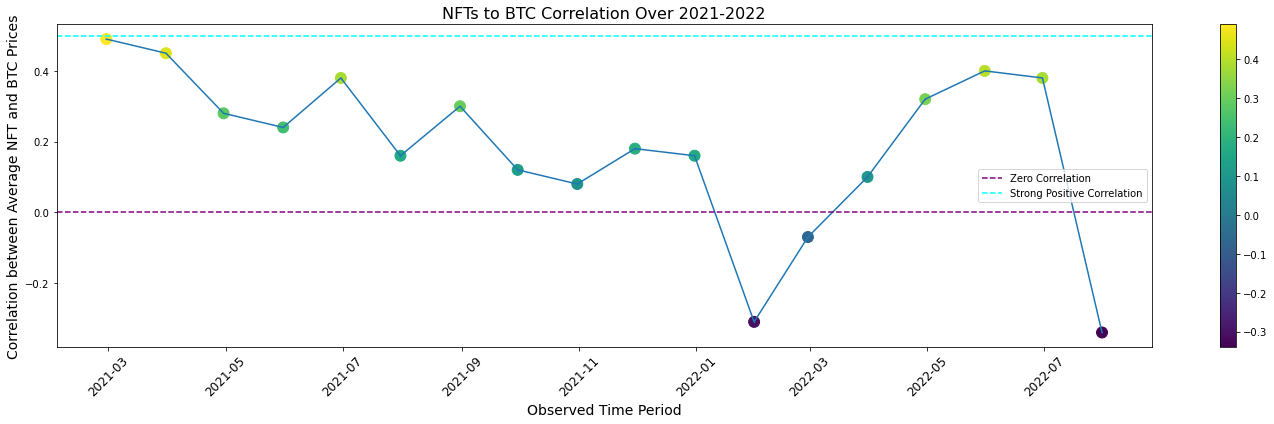

In [72]:
x = []
y = []
for date, el in nft_btc_by_months.iteritems():
    x.append(date)
    y.append(round(el, 2))
    
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(20,6))
plt.scatter(x, y, c=y, cmap=cm, s=120)
plt.plot(x, y, marker = '.', markersize = 1)
plt.axhline(y = 0, color = 'purple', linestyle = '--', label= "Zero Correlation")
plt.axhline(y = 0.5, color = 'aqua', linestyle = '--', label= "Strong Positive Correlation")
plt.legend(loc = 'center right')
plt.colorbar()
plt.xticks(fontsize=12, rotation=45)
plt.title("NFTs to BTC Correlation Over 2021-2022", fontsize=16)
plt.xlabel("Observed Time Period", fontsize=14)
plt.ylabel("Correlation between Average NFT and BTC Prices", fontsize=14)
plt.tight_layout()
plt.show()

##### MANA/BTC Correlation Over 2021-2022

In [73]:
#Visualizing the rolling correlation
df_nft_new['MANA_BTC_COR'] = df_nft_new['MANA Price'].rolling(48).corr(df_nft_new['BTC Price'])

C:\Users\35989\AppData\Local\Temp/ipykernel_20396/2778504212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nft_new['MANA_BTC_COR'] = df_nft_new['MANA Price'].rolling(48).corr(df_nft_new['BTC Price'])


In [74]:
df_nft_new.index = pd.to_datetime(df_nft_new['Date'],format='%y/%m/%d')

In [75]:
mana_btc_by_months = df_nft_new.groupby(pd.Grouper(key="Date", freq="M"))['MANA_BTC_COR'].mean()
mana_btc_by_months = mana_btc_by_months.dropna()

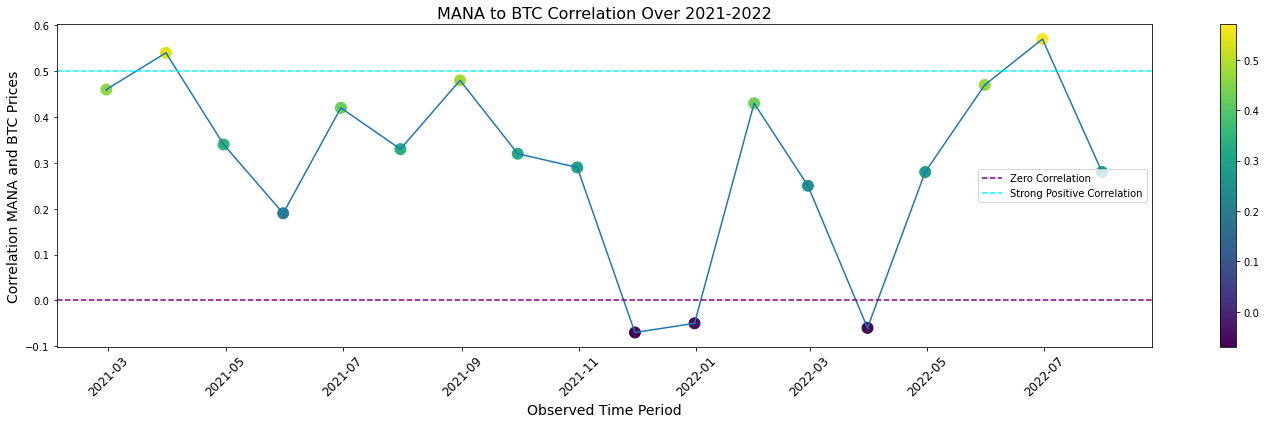

In [76]:
x = []
y = []
for date, el in mana_btc_by_months.iteritems():
    x.append(date)
    y.append(round(el, 2))
    
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(20,6))
plt.scatter(x, y, c=y, cmap=cm, s=120)
plt.plot(x, y, marker = '.', markersize = 1)
plt.axhline(y = 0, color = 'purple', linestyle = '--', label= "Zero Correlation")
plt.axhline(y = 0.5, color = 'aqua', linestyle = '--', label= "Strong Positive Correlation")
plt.legend(loc = 'center right')
plt.colorbar()
plt.xticks(fontsize=12, rotation=45)
plt.title("MANA to BTC Correlation Over 2021-2022", fontsize=16)
plt.xlabel("Observed Time Period", fontsize=14)
plt.ylabel("Correlation MANA and BTC Prices", fontsize=14)
plt.tight_layout()
plt.show()

## 6. Build a Model to Confirm or Reject Your Prediction 

I will try to create a linear regression model using the data on the NFT-related MANA token with the aim of confirming that, based on the historical price data, the MANA price over the period May-July 2022 would have been higher than it was in reality. These lower prices over that timeframe are due, in my opinion, to the effects of the "bear market". 

### 6.1. Create a Linear Regression Model to Predict the Asset's Future Price

In [77]:
df_dcntrl.set_index('Date', inplace=True)
### 6.1. Create a Linear Regression Model to Predict the Asset's Future Price

In [78]:
x = df_dcntrl[['Open', 'High', 'Low', 'Volume']].values
y = df_dcntrl['Close'].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
regressor = LinearRegression()

In [81]:
regressor.fit(x_train, y_train)

LinearRegression()

In [82]:
print(regressor.coef_)

[-5.06315878e-01  1.11282131e+00  3.75852897e-01 -4.84513154e-11]


In [83]:
print(regressor.intercept_)

-0.0023601610273851215


In [84]:
predicted = regressor.predict(x_test)

In [85]:
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.017554474227273544
Mean Squared Error: 0.004123853531247186
Root Mean Squared Error: 0.06421723702595111


In [87]:
graph = dframe.tail(70).set_index(df_dcntrl.tail(70).index)

Text(0.5, 1.0, 'Actual Vs. Predicted Price')

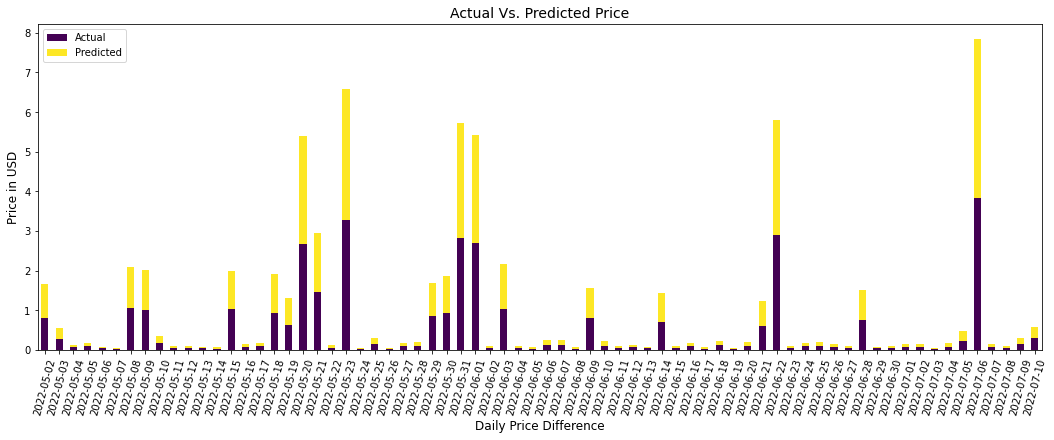

In [88]:
ax = graph.plot(kind='bar' , stacked=True, figsize=(18,6), rot=75, cmap='viridis')
ax.set_xlabel('Daily Price Difference', fontsize=12)
ax.set_ylabel('Price in USD', fontsize=12)
ax.set_title('Actual Vs. Predicted Price', fontsize=14)

### 6.2. Create a Classification Model to Check Whether Future Price is Higher or Lower

The Linear Regression model may not be the best choice for predicting market dynamics since the stock market data, and similarly the crypto market data, is inherently non-linear.

Therefore, a Classification model may better predict whether prices are about to go up or down. In this case, if the following day's price is expected to be higher than the current one's, the target will be 1. Inversely, if the expected price is lower, the target will be 0.

In [89]:
df_dcntrl

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-11-09,0.014329,0.016111,0.013886,0.015130,653800,USD
2017-11-10,0.015162,0.015734,0.012645,0.012940,296429,USD
2017-11-11,0.013201,0.013616,0.011758,0.011979,237865,USD
2017-11-12,0.011975,0.011975,0.010125,0.010505,242761,USD
2017-11-13,0.010628,0.011660,0.010628,0.011330,225836,USD
...,...,...,...,...,...,...
2022-07-06,0.874363,0.926837,0.861758,0.914451,210947220,USD
2022-07-07,0.914496,0.945209,0.908165,0.934855,210038734,USD
2022-07-08,0.934846,0.954595,0.890449,0.902864,188567375,USD


In [90]:
# Ensuring the actual closing price is correct
data = df_dcntrl[["Close"]]
data = data.rename(columns= {'Close':'Actual_Close'})

# Setting up the target.  This identifies if the price went up or down - 1 for Up and 0 for Down
data["Target"] = df_dcntrl.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [91]:
# Shifting token prices forward one day, so we're predicting tomorrow's stock prices from today's prices
df_prev = df_dcntrl.copy()
df_prev = df_prev.shift(1)

In [92]:
# Creating the predictors aka the training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(df_prev[predictors]).iloc[1:]

In [93]:
data.head(5)

,Actual_Close,Target,Close,Volume,Open,High,Low
Date,,,,,,,
2017-11-10,0.012940,0.0,0.015130,653800.0,0.014329,0.016111,0.013886
2017-11-11,0.011979,0.0,0.012940,296429.0,0.015162,0.015734,0.012645
2017-11-12,0.010505,0.0,0.011979,237865.0,0.013201,0.013616,0.011758
2017-11-13,0.011330,1.0,0.010505,242761.0,0.011975,0.011975,0.010125
2017-11-14,0.011419,1.0,0.011330,225836.0,0.010628,0.011660,0.010628


In [94]:
#Creating a machine learning model
#Creating a random forest classification model = a series of individual decision tree models (in this case = 200) 
#Set min_samples_split high to ensure we don't overfit. Random_state=1 ensures that every time we run the model, we'll get the same results.
model = RandomForestClassifier(n_estimators=200, min_samples_split=200, random_state=1)

# Create a train and test set. Predicting the last 70 rows.
train = data.iloc[:-70]
test = data.iloc[-70:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, n_estimators=200, random_state=1)

In [95]:
# Evaluate error of predictions - here the accuracy is 64%, not so good
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6410256410256411

In [96]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

In [97]:
#Creating a backtesting engine
def backtest(data, model, predictors, start=1000, step=250):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the random forest model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [98]:
predictions = backtest(data, model, predictors)

In [99]:
predictions["Predictions"].value_counts()

0.0    555
1.0    149
Name: Predictions, dtype: int64

In [100]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5302013422818792

In [101]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [102]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [103]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [104]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5555555555555556

In [105]:
# Show how many trades we would make - we only trade if the price is expected to go higher
predictions["Predictions"].value_counts()

0.0    330
1.0      9
Name: Predictions, dtype: int64

## 7. Analyze the Results and Draw a Conclusion

### 7.1. Cryptocurrencies' Correlation with BTC

My prediction that all cryptocurrencies' prices have a strong positive correlation with BTC's price were proven right for 6 of the selected 9 assets, as the correlation was strongest between ETH and BTC. 

I analyzed the remaining 3 cryptocurrencies for which my hypothesis was wrong, namely EOS, NEM, and ZEC. What I found out is:
1. EOS:
* The months during which a strong positive correlation existed were almost the same number as those during which a negative one  was at place. 
* The negative correlation was present for around 7 months in total, but they are spread around and alternating with positive correlation. So, no single event could have contributed to the negative correlation.
__Consequently, we can conclude that there was almost no correlation between EOS and BTC during the observed period.__
2. NEM:
* There were no periods of a strong positive correlation, except for 1 month of the observed period.
* The negative correlation periods were spread around and alternating with with positive correlation ones. So, no single event could have contributed to the negative correlation.
__NEM is still proved to be correlated with BTC, just not as strong as I predicted.__
3. ZEC:
* ZEC's correlation with BTC is overwhelmingly positive with only 4 months of negative correlation recorded. 
* The negative correlation periods were again spread around and alternating with with positive correlation ones. So, no single event could have contributed to the negative correlation.
__ZEC is still proved to be correlated with BTC, just not as strong as I predicted.__

__My first prediction can be considered proven.__

### 7.2. NFTs' Correlation with BTC

My prediction that prices of both NFTs and NFT-related tokens have a positive correlation with BTC is proven right.

1. NFTs

The visualization of the 2021-2022 correlation of NFTs and BTC prices is quite interesting. It shows a negative correlation in the beginning of 2022, or just around the period of the Nansen report cited in the beginning. However, that negative correlation was quickly reverted, and during the months from April through July of 2022, or exactly the time of the beginning of the BTC's bear market, the correlation is positive. __That definitely proves my thesis.__

2. MANA Token

The MANA's token's price correlation with BTC has been alternating between a positive and a negative one. However, during the period of BTC's bear market or May/June/July of 2022, the correlation is positive, even strongly positive in July. __That definitely proves my thesis too.__

__My second prediction can be considered proven too.__


### 7.3. Models

The models shown in Section 6. predict MANA's price during the period between May 2nd and July 10th 2022, or again the time of BTC's bear market. __They prove that, based on historical price data, the price of the MANA token during that period was supposed to be and would have been much higher, if it was not affected and influenced by the drop in the BTC price.__